# WeatherPy

# Analysis:
    Weather becomes warmer as we move towards equator.                                                                 There is no storng relationship between latitude, windspeed and cloudiness.                                         Most of the cities had either 100% cloudiness or 0%, compartatively less cities sit between 0-100%.                 When it comes to windspeed, there were more cities in northern hemisphere which had higher wind speed.

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [87]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [88]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
    
city_list = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

# Loop through cities in group of 50 as per starter code
for i, city in enumerate(cities):
        
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create final URL
    query_url = url + "&q=" + city
    
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    
    record_count += 1

    
    try:
        
        city_weather = requests.get(query_url).json()

        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_cloudiness = city_weather["clouds"]["all"]
        city_windspeed = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append to list
        city_list.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_cloudiness,
                          "Wind Speed": city_windspeed,
                          "Country": city_country,
                          "Date": city_date})

    #  skip the city if any error observed
    except:
        print("City not found. Skipping...")
        pass
    
 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kuito
Processing Record 2 of Set 1 | naze
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | port-gentil
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | barga
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | havre-saint-pierre
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | tautira
Processing Record 13 of Set 1 | bathsheba
Processing Record 14 of Set 1 | ormara
Processing Record 15 of Set 1 | lakes entrance
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | port lin

Processing Record 38 of Set 4 | bayir
Processing Record 39 of Set 4 | tahlequah
Processing Record 40 of Set 4 | lima
Processing Record 41 of Set 4 | burkhala
City not found. Skipping...
Processing Record 42 of Set 4 | verkhnevilyuysk
Processing Record 43 of Set 4 | luderitz
Processing Record 44 of Set 4 | mar del plata
Processing Record 45 of Set 4 | komsomolskiy
Processing Record 46 of Set 4 | fort saint james
Processing Record 47 of Set 4 | almeirim
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | eirunepe
Processing Record 0 of Set 5 | saskylakh
Processing Record 1 of Set 5 | esso
Processing Record 2 of Set 5 | bertinoro
Processing Record 3 of Set 5 | victor harbor
Processing Record 4 of Set 5 | deputatskiy
Processing Record 5 of Set 5 | coihaique
Processing Record 6 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 7 of Set 5 | svecha
Processing Record 8 of Set 5 | tsihombe
City not found. Skipping...
Processin

Processing Record 24 of Set 8 | constitucion
Processing Record 25 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 26 of Set 8 | nisia floresta
Processing Record 27 of Set 8 | axim
Processing Record 28 of Set 8 | antagan
City not found. Skipping...
Processing Record 29 of Set 8 | gejiu
Processing Record 30 of Set 8 | marcona
City not found. Skipping...
Processing Record 31 of Set 8 | hay river
Processing Record 32 of Set 8 | gimli
Processing Record 33 of Set 8 | lakselv
Processing Record 34 of Set 8 | bonavista
Processing Record 35 of Set 8 | leningradskiy
Processing Record 36 of Set 8 | skjervoy
Processing Record 37 of Set 8 | perpignan
Processing Record 38 of Set 8 | makakilo city
Processing Record 39 of Set 8 | beringovskiy
Processing Record 40 of Set 8 | taoudenni
Processing Record 41 of Set 8 | yangambi
Processing Record 42 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 43 of Set 8 | tongliao
Processing Record 44 of Set 8 | pudozh
Processing Record 45 o

Processing Record 10 of Set 12 | pochutla
Processing Record 11 of Set 12 | bako
Processing Record 12 of Set 12 | bitung
Processing Record 13 of Set 12 | pasighat
Processing Record 14 of Set 12 | sibu
Processing Record 15 of Set 12 | fenoarivo
Processing Record 16 of Set 12 | sabinas hidalgo
Processing Record 17 of Set 12 | chhapar
Processing Record 18 of Set 12 | pangai
Processing Record 19 of Set 12 | bay city
Processing Record 20 of Set 12 | port hardy
Processing Record 21 of Set 12 | canton
Processing Record 22 of Set 12 | falealupo
City not found. Skipping...
Processing Record 23 of Set 12 | papara
Processing Record 24 of Set 12 | qandala
Processing Record 25 of Set 12 | lakatoro
Processing Record 26 of Set 12 | asfi
Processing Record 27 of Set 12 | pevek
Processing Record 28 of Set 12 | albertville
Processing Record 29 of Set 12 | bentiu
Processing Record 30 of Set 12 | nardaran
Processing Record 31 of Set 12 | half moon bay
Processing Record 32 of Set 12 | kondinskoye
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [89]:
city_list_pd = pd.DataFrame(city_list)
city_list_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kuito,-12.3833,16.9333,49.50,41,11,4.00,AO,1627624643
1,naze,28.3667,129.4833,83.32,81,94,1.66,JP,1627624644
2,port-gentil,-0.7193,8.7815,76.96,83,75,10.36,GA,1627624644
3,rikitea,-23.1203,-134.9692,71.46,74,1,6.11,PF,1627624644
4,busselton,-33.6500,115.3333,52.09,63,84,23.53,AU,1627624645


In [90]:
city_list_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.691212,20.359744,69.594303,67.984509,50.874355,7.792375,1.627625e+09
std,33.570318,91.202550,14.324659,21.895633,37.905232,5.822957,6.648665e+01
min,-54.800000,-179.166700,31.060000,7.000000,0.000000,0.000000,1.627624e+09
25%,-8.767600,-58.400000,60.260000,54.000000,10.000000,3.710000,1.627625e+09
50%,25.208800,27.346500,71.560000,72.000000,54.000000,6.310000,1.627625e+09
75%,50.233400,101.100000,80.010000,86.000000,90.000000,10.670000,1.627625e+09
max,78.218600,179.316700,104.040000,100.000000,100.000000,39.800000,1.627625e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [91]:
#  Get the indices of cities that have humidity over 100%.
city_humidity = city_list_pd[(city_list_pd["Humidity"] > 100)].index                        
city_humidity

Int64Index([], dtype='int64')

In [92]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_list_pd.drop(city_humidity, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kuito,-12.3833,16.9333,49.50,41,11,4.00,AO,1627624643
1,naze,28.3667,129.4833,83.32,81,94,1.66,JP,1627624644
2,port-gentil,-0.7193,8.7815,76.96,83,75,10.36,GA,1627624644
3,rikitea,-23.1203,-134.9692,71.46,74,1,6.11,PF,1627624644
4,busselton,-33.6500,115.3333,52.09,63,84,23.53,AU,1627624645


In [93]:
#Export Data to CSV
clean_city_data.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

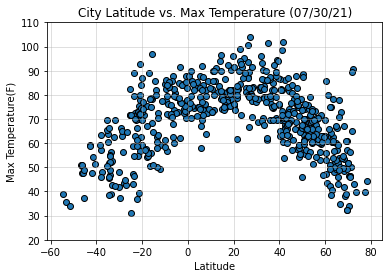

In [94]:
# Create a Scatter Plot for Latitude vs. Temperature

plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], edgecolor="black",marker="o")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.grid(b=None, which='major', axis='both', alpha = 0.5) 
plt.ylim(20,110)
plt.savefig("output_data/Fig1.png")
plt.show()

Temperature increases as we move towards equator and reduces as we move away from equator to hemispheres.

## Latitude vs. Humidity Plot

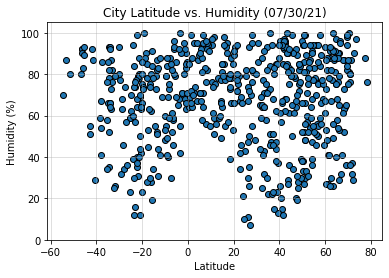

In [95]:
# Create a Scatter Plot for Latitude vs. Humidity

plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], edgecolor="black",marker="o")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0,105)
plt.grid(b=None, which='major', axis='both', alpha = 0.5) 
plt.savefig("output_data/Fig2.png")
plt.show()

When it comes to Latitude vs Humidity, there is no real relationship/pattern that can be found here.

## Latitude vs. Cloudiness Plot

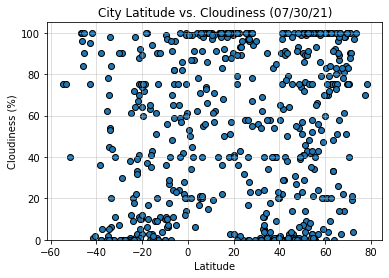

In [96]:
# Create a Scatter Plot for Latitude vs. Cloudlines

plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], edgecolor="black",marker="o")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(0,105)
plt.grid(b=None, which='major', axis='both', alpha = 0.5) 
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

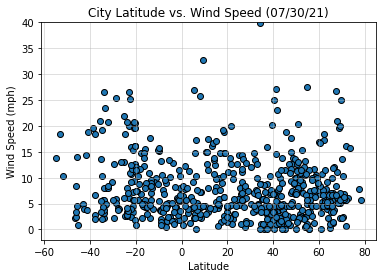

In [97]:
# Create a Scatter Plot for Latitude vs. Wind Speed 

plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], edgecolor="black",marker="o")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(-2,40)
plt.grid(b=None, which='major', axis='both', alpha = 0.5) 
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [98]:
# Define Northern and Southern Hemisphere 
northern_hem = city_list_pd.loc[(city_list_pd["Lat"] >= 0)]
southern_hem = city_list_pd.loc[(city_list_pd["Lat"] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.43114265131585233
slope: -0.452360, intercept: 89.608653


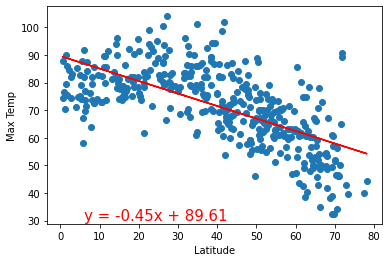

In [99]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Max Temp"]


# Regresson Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
print("slope: %f, intercept: %f" % (slope, intercept))
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4393931134582324
slope: 0.752126, intercept: 80.984480


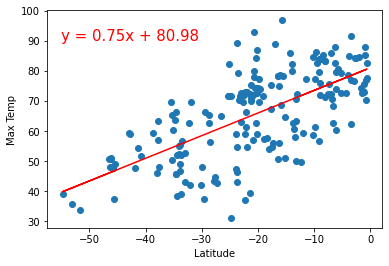

In [100]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Max Temp"]


# Regresson Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
print("slope: %f, intercept: %f" % (slope, intercept))
plt.show()

R-Value of ~ 0.40 indicates there might be weak realtonship between lattitude annd maximum tempertaure. R-Values for both hemispheres are almost same.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0061970483250750955
slope: -0.087313, intercept: 72.298949


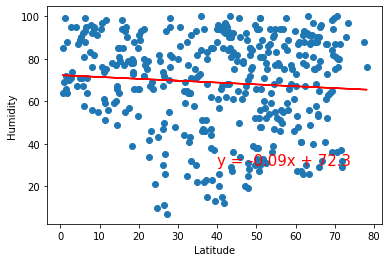

In [101]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Humidity"]


# Regresson Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
print("slope: %f, intercept: %f" % (slope, intercept))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0002175335744895539
slope: 0.024125, intercept: 66.746551


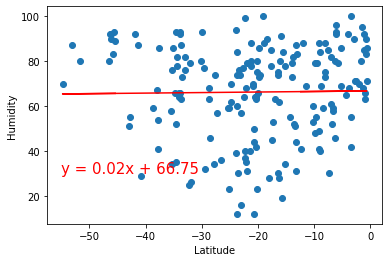

In [102]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Humidity"]


# Regresson Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
print("slope: %f, intercept: %f" % (slope, intercept))
plt.show()

Lower r-value suggests very weak relationship between Humidity and latittude. Difference between both the hemispheres is insignificant.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.001440763061402384
slope: -0.071096, intercept: 58.861760


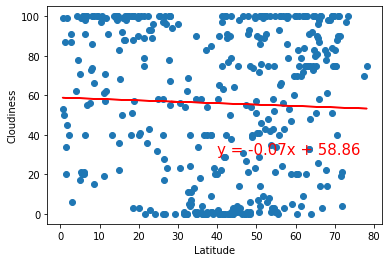

In [103]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Cloudiness"]


# Regresson Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
print("slope: %f, intercept: %f" % (slope, intercept))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0002564453686052108
slope: -0.045201, intercept: 39.037062


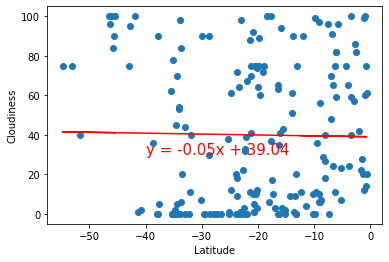

In [104]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Cloudiness"]


# Regresson Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
print("slope: %f, intercept: %f" % (slope, intercept))
plt.show()

Weaker r-value indicates no relationship between cloudiness and latittude. Difference between both the hemispheres is almost non-existent.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00038292516486058037
slope: -0.005535, intercept: 7.680421


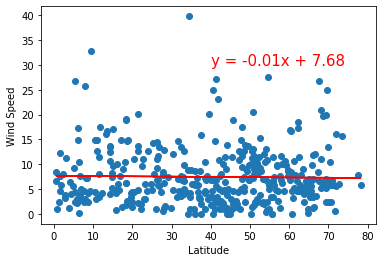

In [105]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Wind Speed"]


# Regresson Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
print("slope: %f, intercept: %f" % (slope, intercept))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03599102976023545
slope: -0.089768, intercept: 6.663574


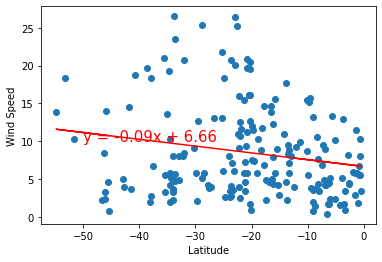

In [106]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Wind Speed"]


# Regresson Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
print("slope: %f, intercept: %f" % (slope, intercept))
plt.show()

Here weaker r-value suggests that there is no correlation between wind speed and latittude. Difference between both the hemispheres is very minute.